In [91]:
import xlrd
import pprint
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [92]:
path = "./datas/国家统计局/Z0208C.xls"
data_people = xlrd.open_workbook(path)
table = data_people.sheets()[0]

In [96]:
age = table.col_values(0, start_rowx=8, end_rowx=28)
total = table.col_values(1, start_rowx=8, end_rowx=28)
male = table.col_values(2, 8, 28)
female = table.col_values(3, 8, 28)

In [109]:
for i in range(len(female)):
    male[i] = -male[i]

In [110]:
male

[-34273.0,
 -33890.0,
 -31141.0,
 -36177.0,
 -50961.0,
 -46693.0,
 -41986.0,
 -43057.0,
 -53017.0,
 -49884.0,
 -35355.0,
 -35892.0,
 -29230.0,
 -19577.0,
 -13748.0,
 -10054.0,
 -5759.0,
 -2104.0,
 -555.0,
 -77.0]

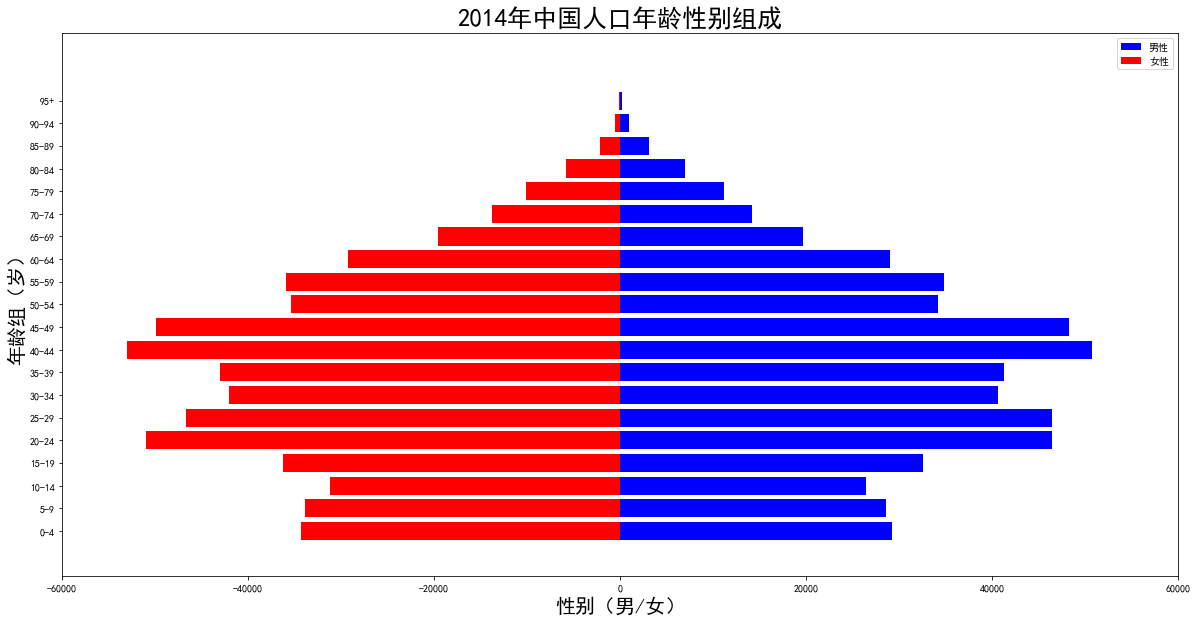

In [121]:
plt.figure(figsize=(20,10))
plt.barh(age, female, color='b', label='男性')
plt.barh(age, male, color='r', label='女性')

# 显示范围
plt.ylim(-2, 22)
plt.xlim(-60000, 60000)

plt.xlabel("性别（男/女）", fontsize=20)
plt.ylabel("年龄组（岁）", fontsize=20)
plt.title("2014年中国人口年龄性别组成", fontsize=25)

# 添加图例
plt.legend(loc='upper right')

In [88]:
years = table.col_values(0, start_rowx=8, end_rowx=58)
years = [int(i) for i in years]
total = table.col_values(1, start_rowx=8, end_rowx=58)
male = table.col_values(2, 8, 58)
female = table.col_values(5, 8, 58)
urban = table.col_values(7, 8, 58)
farm = table.col_values(9, 8, 58)

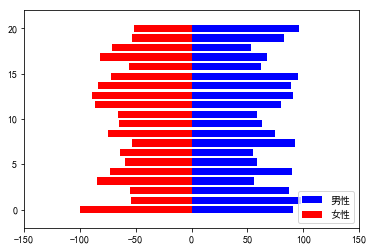

In [66]:
# 生成数据

x = np.linspace(0, 20, 20)
y1 = np.random.randint(50, 100, 20)
y2 = np.random.randint(-100, -50, 20)

plt.barh(x, y1, color='b', label='男性')
plt.barh(x, y2, color='r', label='女性')

# 显示范围
plt.ylim(-2, 22)
plt.xlim(-150, 150)

# 添加图例
plt.legend(loc='lower right')

In [65]:
y2

array([-74, -87, -53, -98, -61, -58, -51, -98, -72, -99, -66, -57, -83,
       -79, -96, -84, -90, -79, -69, -93])

In [20]:
x1

array([  0.        ,  -0.40816327,  -0.81632653,  -1.2244898 ,
        -1.63265306,  -2.04081633,  -2.44897959,  -2.85714286,
        -3.26530612,  -3.67346939,  -4.08163265,  -4.48979592,
        -4.89795918,  -5.30612245,  -5.71428571,  -6.12244898,
        -6.53061224,  -6.93877551,  -7.34693878,  -7.75510204,
        -8.16326531,  -8.57142857,  -8.97959184,  -9.3877551 ,
        -9.79591837, -10.20408163, -10.6122449 , -11.02040816,
       -11.42857143, -11.83673469, -12.24489796, -12.65306122,
       -13.06122449, -13.46938776, -13.87755102, -14.28571429,
       -14.69387755, -15.10204082, -15.51020408, -15.91836735,
       -16.32653061, -16.73469388, -17.14285714, -17.55102041,
       -17.95918367, -18.36734694, -18.7755102 , -19.18367347,
       -19.59183673, -20.        ])

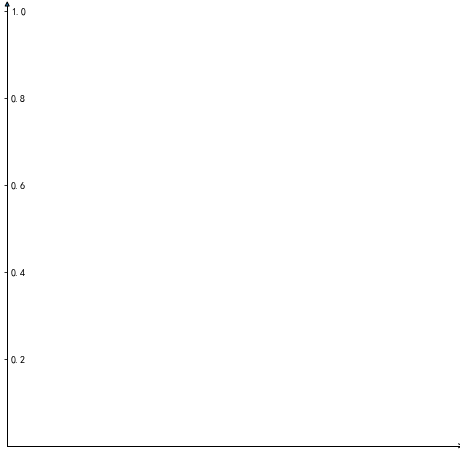

In [38]:
import mpl_toolkits.axisartist as axisartist
#创建画布
fig = plt.figure(figsize=(8, 8))
#使用axisartist.Subplot方法创建一个绘图区对象ax
ax = axisartist.Subplot(fig, 111)  
#将绘图区对象添加到画布中
fig.add_axes(ax)
ax.axis[:].set_visible(False)
ax.axis["x"] = ax.new_floating_axis(0,0)
ax.axis["x"].set_axisline_style("->", size = 1.0)

ax.axis["y"] = ax.new_floating_axis(1,0)
ax.axis["y"].set_axisline_style("-|>", size = 1.0)

ax.axis["x"].set_axis_direction("top")
ax.axis["y"].set_axis_direction("right")

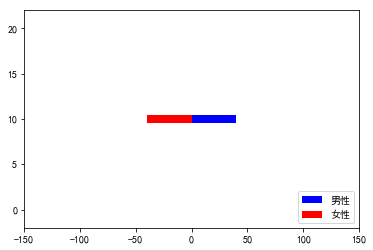

In [61]:
a = 10

f = 40

m = 40

plt.barh(a, m, color='b', label='男性')
plt.barh(a, -f, color='r', label='女性')

# 显示范围
plt.ylim(-2, 22)
plt.xlim(-150, 150)

# 添加图例
plt.legend(loc='lower right')